## <p style='text-align:center'><b>`Lab04: Logistic Regression, Logistic Loss`</b></font>

In this ungraded lab, you will:
- explore the reason the squared error loss is not appropriate for logistic regression
- explore the logistic loss function

In [55]:
from matplotlib import cm
from lab_utils_common import sigmoid, dlblue, dlorange, np, plt, compute_cost_matrix
import numpy as np
#%matplotlib widget
import matplotlib.pyplot as plt
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
plt.style.use('./deeplearning.mplstyle')

### <b><font color = green|>I.) Squared error for logistic regression</font></b>
<img align="left" src="./images/C1_W3_SqErrorVsLogistic.png"     style=" width:600px; padding: 10px; " > Recall for **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

Recall, the squared error cost had the nice property that following the derivative of the cost leads to the minimum.

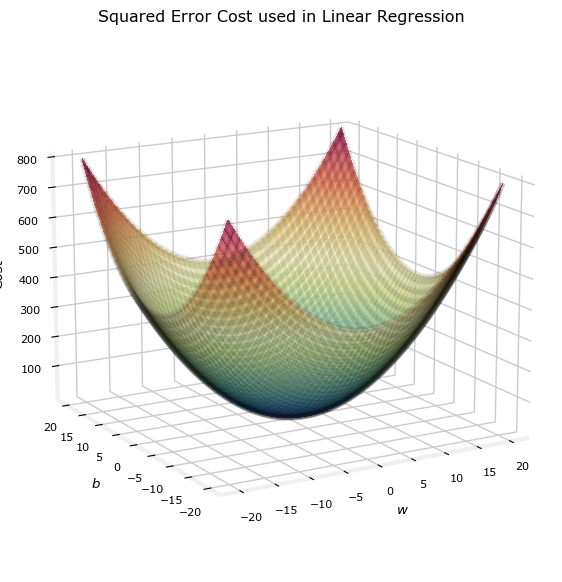

In [86]:
def soup_bowl():
    """ creates 3D quadratic error surface """
    # Create figure and plot with a 3D projection
    fig = plt.figure(figsize=(7,15))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    # Plot configuration
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_rotate_label(False)
    ax.view_init(15, -120)

    # Useful linearspaces to give values to the parameters w and b
    w = np.linspace(-20, 20, 100)
    b = np.linspace(-20, 20, 100)

    # Get the z value for a bowl-shaped cost function
    z=np.zeros((len(w), len(b)))
    j=0
    for x in w:
        i=0
        for y in b:
            z[i,j] = x**2 + y**2
            i+=1
        j+=1

    # Meshgrid used for plotting 3D functions
    W, B = np.meshgrid(w, b)

    # Create the 3D surface plot of the bowl-shaped cost function
    ax.plot_surface(W, B, z, cmap = "Spectral_r", alpha=0.7, antialiased=False)
    ax.plot_wireframe(W, B, z, color='k', alpha=0.1)
    ax.set_xlabel("$w$")
    ax.set_ylabel("$b$")
    ax.set_zlabel("Cost", rotation=90)
    ax.set_title("Squared Error Cost used in Linear Regression")

    plt.show()
    
soup_bowl()

This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out, $f_{wb}(x)$ now has a non-linear component, the sigmoid function:   $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$.   Let's try a squared error cost on the example from an earlier lab, now including the sigmoid.

Here is our training data:

In [63]:
def plt_simple_example(x, y):
    """ plots tumor data """
    pos = y == 1
    neg = y == 0

    fig,ax = plt.subplots(1,1,figsize=(5,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    
    ax.scatter(x[pos], y[pos], marker='x', s=80, c = 'red', label="malignant")
    ax.scatter(x[neg], y[neg], marker='o', s=100, label="benign", facecolors='none', edgecolors=dlblue,lw=3)
    ax.set_ylim(-0.075,1.1)
    ax.set_ylabel('y')
    ax.set_xlabel('Tumor Size')
    ax.legend(loc='lower right')
    ax.set_title("Example of Logistic Regression on Categorical Data")

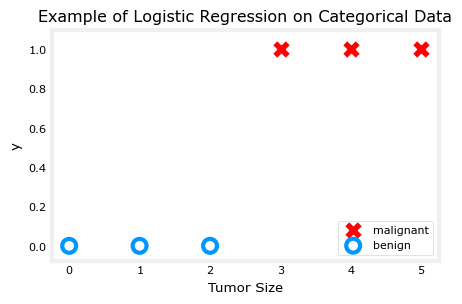

In [64]:
x_train = np.array([0,1,2,3,4,5],dtype=np.longdouble)
y_train = np.array([0,0,0,1,1,1],dtype=np.longdouble)
plt_simple_example(x=x_train,y=y_train)

Now, let's get a surface plot of the cost using a *squared error cost*:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ 
 
where 
  $$f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$$


In [65]:
def compute_cost_logistic_sq_err(X, y, w, b):
    """
    compute sq error cost on logicist data (for negative example only, not used in practice)
    Args:
      X (ndarray): Shape (m,n) matrix of examples with multiple features
      w (ndarray): Shape (n)   parameters for prediction
      b (scalar):              parameter  for prediction
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)                 #add sigmoid to normal sq error cost for linear regression
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return np.squeeze(cost)

In [77]:
def plt_logistic_squared_error(X,y):
    
    """ plots logistic squared error for demonstration """
    
    wx, by = np.meshgrid(np.linspace(-6,12,50),np.linspace(10, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0])

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = compute_cost_logistic_sq_err(X.reshape(-1,1), y, w, b)
    cost = cost.reshape(wx.shape)

    fig = plt.figure(figsize=(10,18))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('"Logistic" Squared Error Cost vs (w, b)')

    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

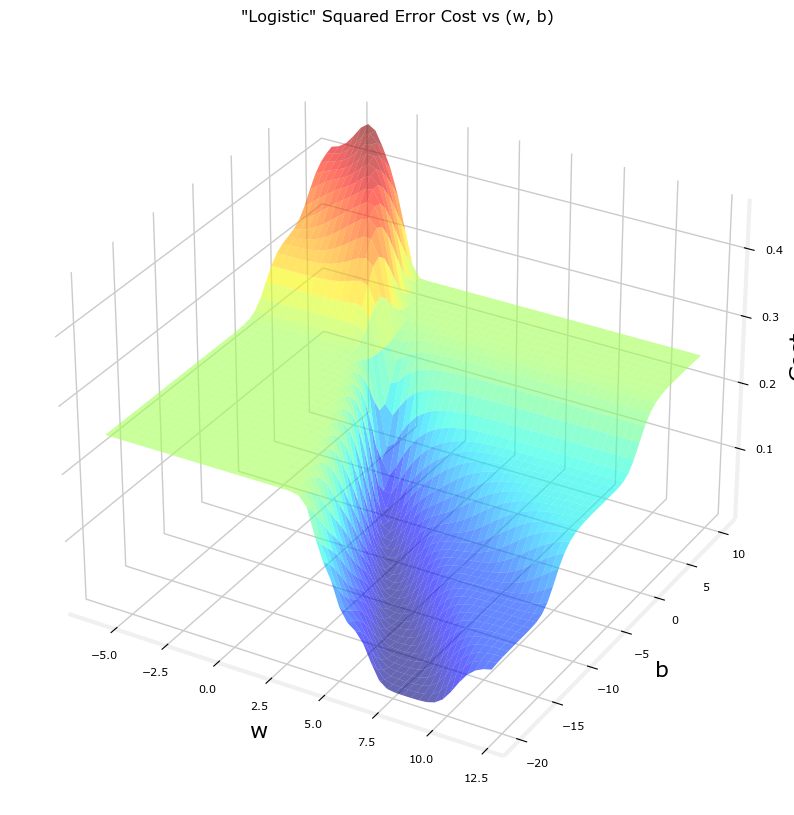

In [78]:
plt.close('all')
plt_logistic_squared_error(X=x_train,y=y_train)
plt.show()

While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression!    

Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function. This is described below.

### <b><font color = green|>II.) Logistic Loss Function</font></b>
<img align="left" src="./images/C1_W3_LogisticLoss_a.png"     style=" width:480px; padding: 2px; " >
<img align="left" src="./images/C1_W3_LogisticLoss_b.png"     style=" width:480px; padding: 2px; " >
<img align="left" src="./images/C1_W3_LogisticLoss_c.png"     style=" width:480px; padding: 2px; " > 

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number. 

>**Definition Note:**   In this course, these definitions are used:  
**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined: 
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

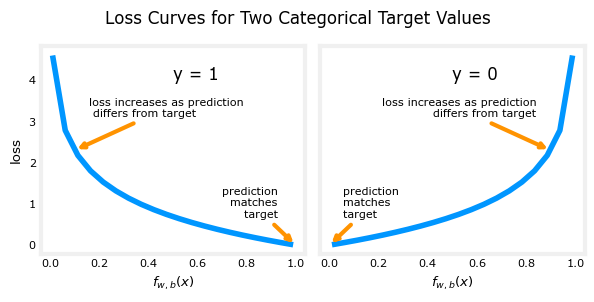

In [79]:
def plt_two_logistic_loss_curves():
  
    """ plots the logistic loss """
  
    fig,ax = plt.subplots(1,2,figsize=(6,3),sharey=True)
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
  
    x = np.linspace(0.01,1-0.01,20)
  
    ax[0].plot(x,-np.log(x))
    #ax[0].set_title("y = 1")
    ax[0].text(0.5, 4.0, "y = 1", fontsize=12)
    ax[0].set_ylabel("loss")
    ax[0].set_xlabel(r"$f_{w,b}(x)$")
  
    ax[1].plot(x,-np.log(1-x))
    #ax[1].set_title("y = 0")
    ax[1].text(0.5, 4.0, "y = 0", fontsize=12)
    ax[1].set_xlabel(r"$f_{w,b}(x)$")
    
    ax[0].annotate("prediction \nmatches \ntarget ", xy= [1,0], xycoords='data',xytext=[-10,30],textcoords='offset points', ha="right", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    
    ax[0].annotate("loss increases as prediction\n differs from target", xy= [0.1,-np.log(0.1)], xycoords='data',xytext=[10,30],textcoords='offset points', 
                   ha="left", va="center",arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    
    ax[1].annotate("prediction \nmatches \ntarget ", xy= [0,0], xycoords='data',xytext=[10,30],textcoords='offset points', ha="left", va="center",
                   arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    
    ax[1].annotate("loss increases as prediction\n differs from target", xy= [0.9,-np.log(1-0.9)], xycoords='data',xytext=[-10,30],textcoords='offset points',
                   ha="right", va="center", arrowprops={'arrowstyle': '->', 'color': dlorange, 'lw': 3},)
    
    plt.suptitle("Loss Curves for Two Categorical Target Values", fontsize=12)
    plt.tight_layout()
    plt.show()
    
plt_two_logistic_loss_curves()

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.
The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

OK, with this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. This will be the topic of the next lab. For now, let's take a look at the cost vs parameters curve for the simple example we considered above:

In [84]:
def plt_logistic_cost(X,y):
    """ plots logistic cost """
    wx, by = np.meshgrid(np.linspace(-6,12,50),
                         np.linspace(0, -20, 40))
    points = np.c_[wx.ravel(), by.ravel()]
    cost = np.zeros(points.shape[0],dtype=np.longdouble)

    for i in range(points.shape[0]):
        w,b = points[i]
        cost[i] = compute_cost_matrix(X.reshape(-1,1), y, w, b, logistic=True, safe=True)
    cost = cost.reshape(wx.shape)

    fig = plt.figure(figsize=(12,9))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(wx, by, cost, alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel("Cost", rotation=90, fontsize=16)
    ax.set_title('Logistic Cost vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax = fig.add_subplot(1, 2, 2, projection='3d')

    ax.plot_surface(wx, by, np.log(cost), alpha=0.6,cmap=cm.jet,)

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel('\nlog(Cost)', fontsize=16)
    ax.set_title('log(Logistic Cost) vs (w, b)')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    plt.show()
    return cost

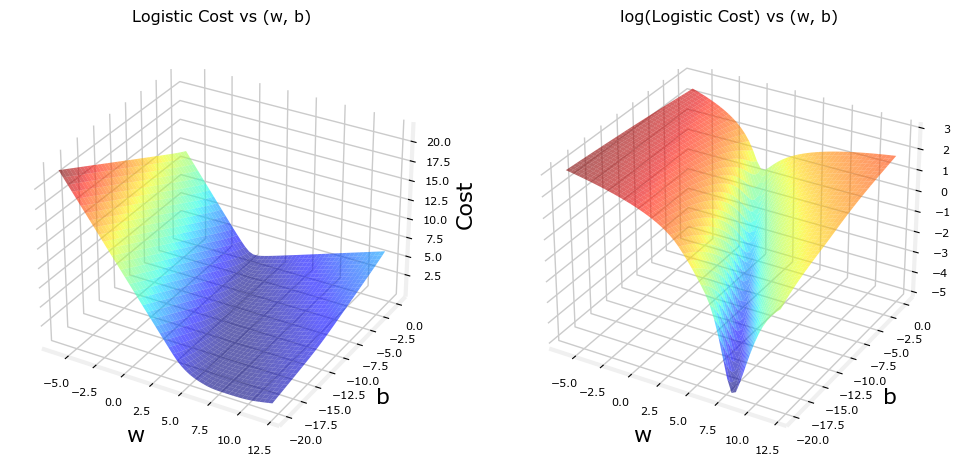

In [85]:
plt.close('all')
cst = plt_logistic_cost(X=x_train,y=y_train)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline. Reminder: you can rotate the above plots using your mouse.
## Congratulation!  
You have:
 - determined a squared error loss function is not suitable for classification tasks
 - developed and examined the logistic loss function which **is** suitable for classification tasks.